<a href="https://colab.research.google.com/github/rldckd0103/pdm02/blob/master/py-tensorflow/tf2_6_mnist_CNN_best_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    * FCN : 1차원 완전연결신경망

***
- ## Traget: **Find the best model**
***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

## Search the best model of C2F2
- callback
    - Early stopping
    - model checkpoint

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)
tf.random.set_seed(0)

2.3.0


In [3]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks

## **데이터 로딩, 정규화**

In [4]:
from keras.datasets import mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

11493376/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [5]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

In [6]:
# y_train0.shape vs. y_train.shape
y_train0.shape, y_train.shape

((60000,), (60000, 10))

### Display numbers
- one random number
- 10 representative numbers

39300


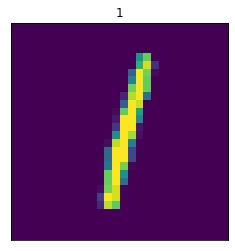

In [7]:
# Code here!
# display one random image from the training set:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx]])
plt.xticks([])
plt.yticks([])
plt.show()

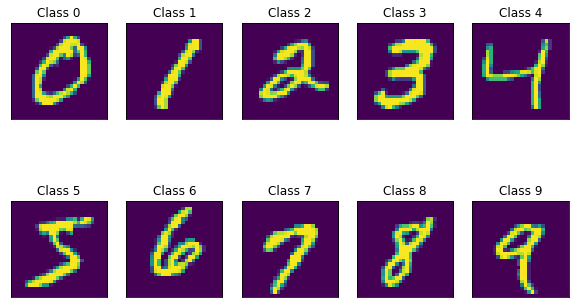

In [8]:
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    # print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])

# Design CNN

### import models, layers, callbacks
- models: Sequential
- layers: Conv2D, MaxPool2D, Flatten
- callbacks: ModelCheckpoint, EarlyStopping

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

## **CNN2 + FCN2**

In [10]:
c2f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [11]:
c2f2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [20]:
# 1st Conv2D parameters
9*32+32

320

In [24]:
cp_callback = callbacks.ModelCheckpoint(filepath="./mnist_c2f2_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=50)    # patience=10, 20, 50

In [19]:
# 2nd Conv2D parameters
32*64*3*3 + 64

18496

In [21]:
# Train CNN model
# Find and save the best model.
hist = c2f2.fit(X_train, y_train, epochs = 500 , batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0591 - val_accuracy: 0.9921
Epoch 2/500
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0629 - val_accuracy: 0.9928
Epoch 3/500
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0681 - val_accuracy: 0.9925
Epoch 4/500
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.0874 - val_accuracy: 0.9919
Epoch 5/500
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0592 - val_accuracy: 0.9922
Epoch 6/500
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0607 - val_accuracy: 0.9932
Epoch 7/500
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0741 -

In [25]:
c2f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 3ms/step - loss: 0.1191 - accuracy: 0.9928


[0.1190977692604065, 0.9927999973297119]

## Graph of loss and accuracy
- model: C2F2

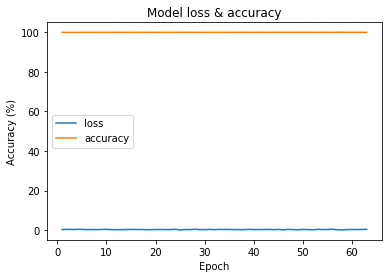

In [27]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 63
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [34]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

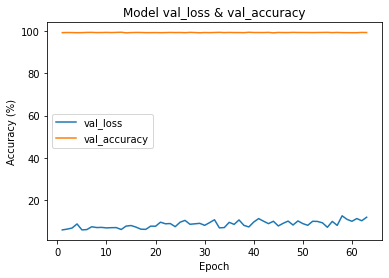

In [35]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

In [31]:
np.argmax(np.array(vacc_list))

12

In [32]:
vacc_list[np.argmax(np.array(vacc_list))]

99.40999746322632

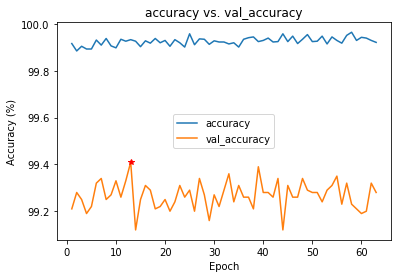

In [36]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*') 

## 최적화된 모형 불러와서 이용

- callbacks.ModelCheckpoint를 이용해서 트레이닝 중 val_accuacy가 가장 높은 모형을 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

>mnist_c2f2_best_weights.013-0.9941.hdf5

In [ ]:
# c2f2.save('cnn_best.hdf5')

In [37]:
from keras.models import load_model

model = load_model('mnist_c2f2_best_weights.013-0.9941.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 4ms/step - loss: 0.0611 - accuracy: 0.9941


[0.06105413660407066, 0.9940999746322632]

## [DIY] C2F3의 best model을 구하시오.

## **CNN2 + FCN3**

In [71]:
c2f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [72]:
c2f3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [73]:
cp_callback = callbacks.ModelCheckpoint(filepath="./mnist_c2f3_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=50)    # patience=10, 20, 50

In [74]:
hist = c2f3.fit(X_train, y_train, epochs = 500 , batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5120 - accuracy: 0.8162 - val_loss: 0.3400 - val_accuracy: 0.8783
Epoch 2/500
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3216 - accuracy: 0.8852 - val_loss: 0.2849 - val_accuracy: 0.8959
Epoch 3/500
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2700 - accuracy: 0.9033 - val_loss: 0.2645 - val_accuracy: 0.9057
Epoch 4/500
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2344 - accuracy: 0.9144 - val_loss: 0.2565 - val_accuracy: 0.9067
Epoch 5/500
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2138 - accuracy: 0.9223 - val_loss: 0.2462 - val_accuracy: 0.9133
Epoch 6/500
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1957 - accuracy: 0.9287 - val_loss: 0.2476 - val_accuracy: 0.9145
Epoch 7/500
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1789 - accuracy: 0.9339 - val_loss: 0.2564 -

In [75]:
c2f3.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 4ms/step - loss: 0.7281 - accuracy: 0.9200


[0.7280572652816772, 0.9200000166893005]

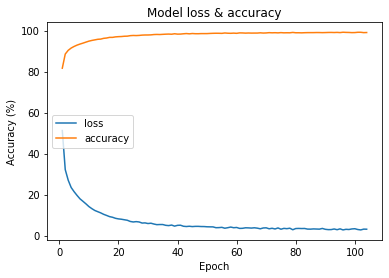

In [76]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 104
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [77]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

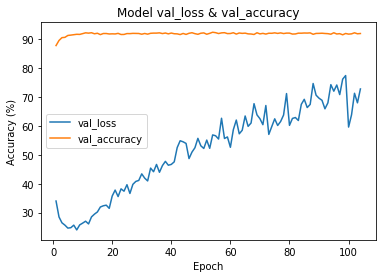

In [78]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

In [79]:
np.argmax(np.array(vacc_list))

53

In [80]:
vacc_list[np.argmax(np.array(vacc_list))]

92.43999719619751

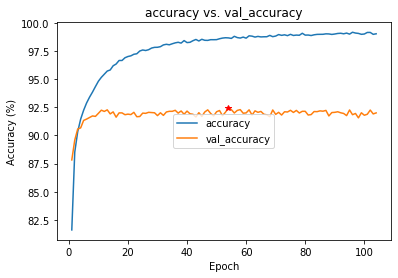

In [81]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*') 

In [82]:
c2f3.save('c2f3_best.hdf5')

In [84]:
from keras.models import load_model

model = load_model('mnist_c2f3_best_weights.054-0.9244.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 4ms/step - loss: 0.5689 - accuracy: 0.9244


[0.5688945651054382, 0.9243999719619751]

***

## [DIY] fashion mnist model의 best model을 구하시오.

- github의 "py-tensorflow" 폴더에 tf2_7_fmnist_CNN_best.ipynb 파일을 올리시오. 
- github의 "py-tensorflow/st-code/model" 폴더에 best model(hdf5 파일)을 올리시오. 

> fashion mnist 데이터 로딩
```
from keras.datasets import fashion_mnist
(X_train0, y_train0), (X_test0, y_test0) = fashion_mnist.load_data()
```

### callbacks

- cp_callback = callbacks.ModelCheckpoint(filepath="./fmnist.{epoch:03d}-{val_accuracy:.4f}.hdf5", monitor='val_accuracy', verbose=0, save_best_only=True)
- es_callback = callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=50)    # patience=10, 20, 50

In [85]:
from keras.datasets import fashion_mnist
(X_train0, y_train0), (X_test0, y_test0) = fashion_mnist.load_data()

In [86]:
print('Train: X=%s, y=%s' % (X_train0.shape, y_train0.shape))
print('Test: X=%s, y=%s' % (X_train0.shape, y_train0.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(60000, 28, 28), y=(60000,)


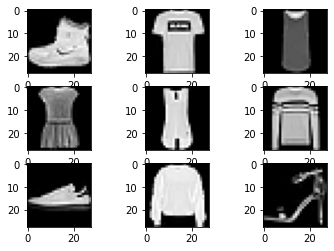

In [87]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train0[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [88]:
# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [89]:
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

3147


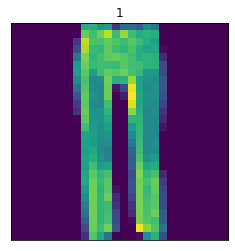

In [90]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx]])
plt.xticks([])
plt.yticks([])
plt.show()

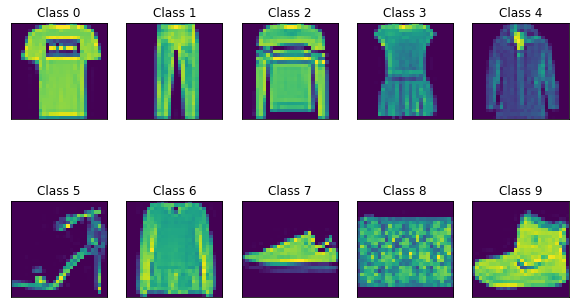

In [91]:
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    # print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])

In [92]:
fmm = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

fmm.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [93]:
cp_callback = callbacks.ModelCheckpoint(filepath="./fmm.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=50)    # patience=10, 20, 50

In [94]:
hist = fmm.fit(X_train, y_train, epochs = 500 , batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4675 - accuracy: 0.8322 - val_loss: 0.3380 - val_accuracy: 0.8794
Epoch 2/500
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3108 - accuracy: 0.8877 - val_loss: 0.2843 - val_accuracy: 0.8932
Epoch 3/500
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2605 - accuracy: 0.9051 - val_loss: 0.2625 - val_accuracy: 0.9041
Epoch 4/500
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2285 - accuracy: 0.9158 - val_loss: 0.2415 - val_accuracy: 0.9114
Epoch 5/500
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2084 - accuracy: 0.9229 - val_loss: 0.2612 - val_accuracy: 0.9057
Epoch 6/500
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1854 - accuracy: 0.9316 - val_loss: 0.2373 - val_accuracy: 0.9135
Epoch 7/500
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1712 - accuracy: 0.9355 - val_loss: 0.2330 -

In [95]:
fmm.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 4ms/step - loss: 0.6656 - accuracy: 0.9213


[0.6655511260032654, 0.9212999939918518]

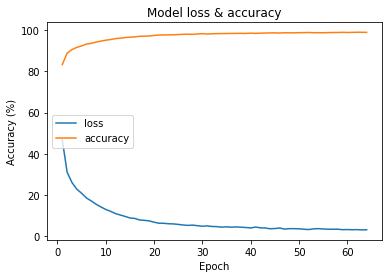

In [97]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 64
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [98]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

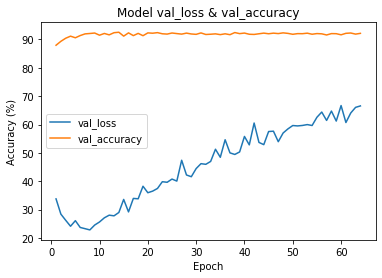

In [99]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

In [100]:
np.argmax(np.array(vacc_list))

13

In [101]:
vacc_list[np.argmax(np.array(vacc_list))]

92.51999855041504

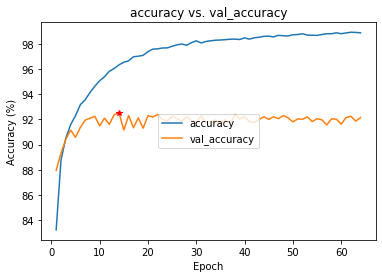

In [102]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*') 

In [103]:
fmm.save('fmm.hdf5')

In [104]:
from keras.models import load_model

model = load_model('fmm.014-0.9252.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 4ms/step - loss: 0.2900 - accuracy: 0.9252


[0.290009081363678, 0.9251999855041504]